In [22]:
import numpy as np
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map
from gym import wrappers
import seaborn as sns
import matplotlib.pyplot as plt
import time

np.random.seed(42)

def run_episode(env, policy, gamma = 1.0, render = False):
    """ Evaluates policy by using it to run an episode and finding its
    total reward.
    args:
    env: gym environment.
    policy: the policy to be used.
    gamma: discount factor.
    render: boolean to turn rendering on/off.
    returns:
    total reward: real value of the total reward recieved by agent under policy.
    """
    obs = env.reset()
    #obs = obs[0]
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        action = policy[obs]
        obs, reward, done, info = env.step(int(action))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward


def evaluate_policy(env, policy, gamma = 1.0,  n = 2000):
    """ Evaluates a policy by running it n times.
    returns:
    average total reward
    """
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return scores

def extract_policy(v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.observation_space.n)
    for s in range(env.observation_space.n):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[s][a]:
                # next_sr is a tuple of (probability, next state, reward, done)
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy


def value_iteration(env, gamma = 1.0):
    """ Value-iteration algorithm """
    v = np.zeros(env.observation_space.n)  # initialize value-function
    max_iterations = 10000
    eps = 1e-20
    for i in range(max_iterations):
        prev_v = np.copy(v)
        for s in range(env.observation_space.n):
            q_sa = [sum([p*(r + prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.action_space.n)] 
            v[s] = max(q_sa)
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            print ('Value-iteration converged at iteration# %d.' %(i+1))
            break
    return v


In [23]:
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.8, 1.0]:
    print("gamma = " + str(i))
    env_name  = 'FrozenLake8x8-v1'
    gamma = i
    env = gym.make(env_name)
    optimal_v = value_iteration(env, i);
    policy = extract_policy(optimal_v, i)
    policy_scores = evaluate_policy(env, policy, i, n=3000)
    print('Policy average score = ', np.mean(policy_scores))
    

gamma = 1e-06
Value-iteration converged at iteration# 2357.
Policy average score =  3.3333400000033304e-112
gamma = 1e-05
Value-iteration converged at iteration# 2357.
Policy average score =  6.666733333333344e-104
gamma = 0.0001
Value-iteration converged at iteration# 2357.
Policy average score =  6.667333366666673e-76
gamma = 0.001
Value-iteration converged at iteration# 2357.
Policy average score =  3.333333333333342e-70
gamma = 0.01
Value-iteration converged at iteration# 2357.
Policy average score =  3.3670033670067683e-40
gamma = 0.1
Value-iteration converged at iteration# 2357.
Policy average score =  3.404502519587621e-23
gamma = 0.2
Value-iteration converged at iteration# 2357.
Policy average score =  1.5320456752858595e-14
gamma = 0.4
Value-iteration converged at iteration# 2357.
Policy average score =  8.296870856409555e-11
gamma = 0.8
Value-iteration converged at iteration# 2357.
Policy average score =  7.003818434055201e-05
gamma = 1.0
Value-iteration converged at iteratio

In [7]:
gamma = 1.0


In [8]:
env_name  = 'FrozenLake8x8-v1'
env = gym.make(env_name)
start = time.time()
optimal_v = value_iteration(env, gamma);
print("Average time: " + str(((time.time() - start))))
policy = extract_policy(optimal_v, gamma)
policy_scores = evaluate_policy(env, policy, gamma, n=3000)
print('Average score = ', np.mean(policy_scores))

Value-iteration converged at iteration# 2357.
Average time: 1.1271429061889648
Average score =  0.8736666666666667


In [ ]:
plt.figure(figsize=(5, 16))
sns.heatmap(policy,  cmap="YlGnBu", annot=True, cbar=False, square=True);

0 1.0
8 3.0
8 3.0
0 1.0
8 3.0
0 1.0
1 2.0
9 3.0
8 3.0
0 1.0
1 2.0
2 2.0
2 2.0
10 3.0
2 2.0
10 3.0
2 2.0
10 3.0
9 3.0
8 3.0
9 3.0
10 3.0
9 3.0
1 2.0
2 2.0
2 2.0
3 1.0
2 2.0
3 1.0
2 2.0
2 2.0
2 2.0
3 1.0
2 2.0
3 1.0
4 2.0
5 2.0
6 2.0
6 2.0
14 3.0
6 2.0
6 2.0
14 3.0
15 2.0
7 2.0
7 2.0
7 2.0
7 2.0
7 2.0
15 2.0
23 2.0
31 2.0
31 2.0
31 2.0
31 2.0
39 2.0
39 2.0
47 2.0
55 2.0
55 2.0


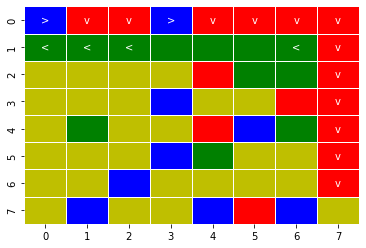

Total Reward:  1.0


In [11]:
def display_value_iteration(P, env = gym.make('FrozenLake8x8-v1')):
    nb_states = env.observation_space.n
    visited_states = np.zeros(nb_states).astype(bool)
    visited_states[0] = 1
    states_labels = np.where(P==0, '<', 
                              np.where(P==1, 'v', 
                                       np.where(P==2, '>', 
                                                np.where(P==3, '^', P)
                                               )
                                      )
                             ) 
    desc = env.unwrapped.desc.ravel().astype(str)
    colors = np.where(desc=='S','y',np.where(desc=='F','b',np.where(desc=='H','r',np.where(desc=='G','g',desc))))
    states_labels = np.zeros(nb_states).astype(str)
    states_labels[:] = ''
    total_reward = 0
    s = env.reset()
    #env.render()
    done = False
    while done != True: 
        best_a = P[s] # select the best next action from the policy
        states_labels[s] = '^' if best_a==0 else ('>' if best_a==1 else ('v' if best_a==2 else '<'))   
        print(s, best_a)
        s, rew, done, info = env.step(best_a) #take step using selected action
        total_reward = total_reward + rew
        visited_states[s] = 1 # mark the state as visited
        #env.render()
    ax = sns.heatmap(P.reshape(int(np.sqrt(nb_states)),int(np.sqrt(nb_states))), 
                 linewidth=0.5, 
                 annot=states_labels.reshape(int(np.sqrt(nb_states)),int(np.sqrt(nb_states))), 
                 cmap=list(colors),
                 fmt = '',
                 cbar=False)
    plt.show()
    print("Total Reward: ", total_reward)
    
# display heatmap for a 4x4 board
display_value_iteration(policy, env = env)

In [24]:
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.8, 1.0]:
    print("gamma = " + str(i))
    random_map = generate_random_map(size=20, p=0.8)
    gamma = i
    env = gym.make("FrozenLake-v1", desc=random_map)
    optimal_v = value_iteration(env, i);
    policy = extract_policy(optimal_v, i)
    policy_scores = evaluate_policy(env, policy, i, n=3000)
    print('Policy average score = ', np.mean(policy_scores))
    

gamma = 1e-06
Value-iteration converged at iteration# 6862.
Policy average score =  0.0
gamma = 1e-05
Policy average score =  0.0
gamma = 0.0001
Policy average score =  0.0
gamma = 0.001
Policy average score =  0.0
gamma = 0.01
Value-iteration converged at iteration# 4680.
Policy average score =  0.0
gamma = 0.1
Value-iteration converged at iteration# 6311.
Policy average score =  0.0
gamma = 0.2
Policy average score =  0.0
gamma = 0.4
Policy average score =  5.230918112822262e-42
gamma = 0.8
Policy average score =  0.0
gamma = 1.0
Policy average score =  0.0
